In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdulrahmankags","key":"f6d6a7aef61e9f142fdf58218ca91a2a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c mercedes-benz-greener-manufacturing

  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 22.0MB/s]
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 51.9MB/s]
  0% 0.00/10.7k [00:00<?, ?B/s]
100% 10.7k/10.7k [00:00<00:00, 9.77MB/s]


In [ ]:
from zipfile import ZipFile
files = ['sample_submission.csv.zip','train.csv.zip','test.csv.zip']
for i in files:
  with ZipFile(i,'r') as zip:
    zip.extractall()
    print('Done')

Done
Done
Done


In [ ]:
# Importing required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.sparse import hstack

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# <font color='red'> <b>EDA - Exploratory Data Analysis</b></font>

In [ ]:
# Reading train data file

train_df = pd.read_csv('train.csv')
train_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Reading test data file

test_df = pd.read_csv('test.csv')
test_df

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Observing number of rows, number of columns, and types of columns present in train dataset

print('Number of rows in train data set:',train_df.shape[0])
print('Number of columns in train data set:',train_df.shape[1])
print('Shape of train data set:',train_df.shape)
print()
print('Types of columns present in train data set:',train_df.dtypes.value_counts())

Number of rows in train data set: 4209
Number of columns in train data set: 378
Shape of train data set: (4209, 378)

Types of columns present in train data set: int64      369
object       8
float64      1
dtype: int64


In [ ]:
# Observing number of rows, number of columns, and types of columns present in test dataset

print('Number of rows in test data set:',test_df.shape[0])
print('Number of columns in test data set:',test_df.shape[1])
print('Shape of test data set:',test_df.shape)
print()
print('Types of columns present in test data set:',test_df.dtypes.value_counts())

Number of rows in test data set: 4209
Number of columns in test data set: 377
Shape of test data set: (4209, 377)

Types of columns present in test data set: int64     369
object      8
dtype: int64


In [ ]:
# Taking out only the categorical / object data type columns

print('Columns that contains categorical data in train dataset:',train_df.columns[train_df.dtypes=='object'].to_list())
print('Columns that contains categorical data in test dataset:',test_df.columns[test_df.dtypes=='object'].to_list())

Columns that contains categorical data in train dataset: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
Columns that contains categorical data in test dataset: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [ ]:
# Checking if there are any null values present in dataset

print('Is there any null or Nan values present in train dataset? :',train_df.isna().values.any())
print('Is there any null or Nan values present in test dataset? :',test_df.isna().values.any())

Is there any null or Nan values present in train dataset? : False
Is there any null or Nan values present in test dataset? : False


**OBSERVATION:**

1. Both train data and test data was explored and observed that there are 4209 rows in both train and test data which are considered to be data points.

2. Train data contains 378 columns as features, in which 368 columns are binary integer variables,1 column is 'ID' feature, 8 columns are object i.e., categorical variables and 1 float variable which signifies the target data column with time in seconds.

3. Test data contains 377 columns as features, in which 368 columns are binary integer variables, 1 column is 'ID' feature, 8 columns are object i.e., categorical variables.

4. Test data do not contain any target data, which must be computed by our model.

5. From observations it was found that both train and test data did not contain any null values.

6. The feature 'ID' to be removed from the train and test data set, since they are unique across all columns since they do not support well for building model and cannot be used as predictors.

**Treating outliers**

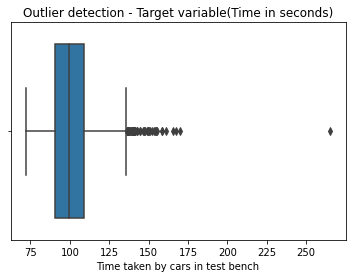

In [ ]:
# Checking for outliers

sns.boxplot(train_df['y'])
plt.xlabel('Time taken by cars in test bench')
plt.title('Outlier detection - Target variable(Time in seconds)')
plt.show()

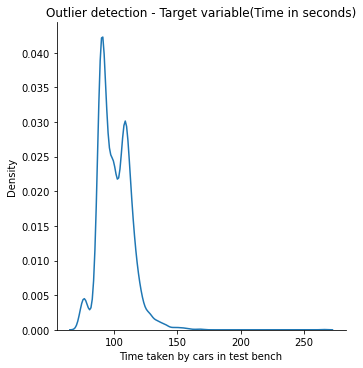

In [ ]:
sns.displot(train_df.y,kind='kde')
plt.xlabel('Time taken by cars in test bench')
plt.title('Outlier detection - Target variable(Time in seconds)')
plt.show()

**OBSERVATION:**
From observation of box-plot and kde plot it was clear that there is an outlier in the train data which was computed based on target variable. Since there is only one such outlier seems to be present in the train data which is very distinct from other points.

In [ ]:
train_df[train_df['y']>=250] # This ID 1170 contains the outlier which was computed based on the target variable data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = train_df
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = train_data['y'].values # Taking out target variable from train data and storing in variable Y

In [ ]:
test_data = test_df
test_data

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<h1>Exploring categorical features </h1>

In [ ]:
print('Number of categorical features:',len(train_data.columns[train_data.dtypes=='object'].to_list()))
print()
print('Names of categorical features:',train_data.columns[train_data.dtypes=='object'].to_list())
categorical_features = train_data.columns[train_data.dtypes=='object'].to_list()

Number of categorical features: 8

Names of categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


**Analyzing cardinality**

In [ ]:
# Number of unique features present in each categorical feature (Cardinality)

categorical_uniques = []
for i in categorical_features:
  categorical_uniques.append(len(train_data[i].unique()))
print('Number of unique features present in each categorical feature:',categorical_uniques)

Number of unique features present in each categorical feature: [47, 27, 44, 7, 4, 29, 12, 25]


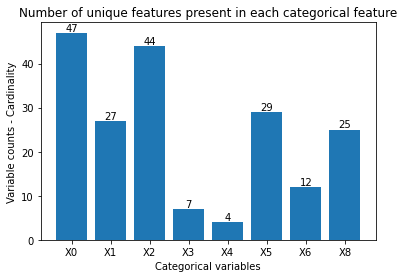

In [ ]:
# Plotting number of cardinality present in each categorical feature

plt.bar(categorical_features,categorical_uniques)
plt.title('Number of unique features present in each categorical feature')
plt.xlabel('Categorical variables')
plt.ylabel('Variable counts - Cardinality')
for i in range(len(categorical_uniques)):
  plt.annotate(str(categorical_uniques[i]), xy=(categorical_features[i],categorical_uniques[i]), ha='center', va='bottom') # creating annotation referred : https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

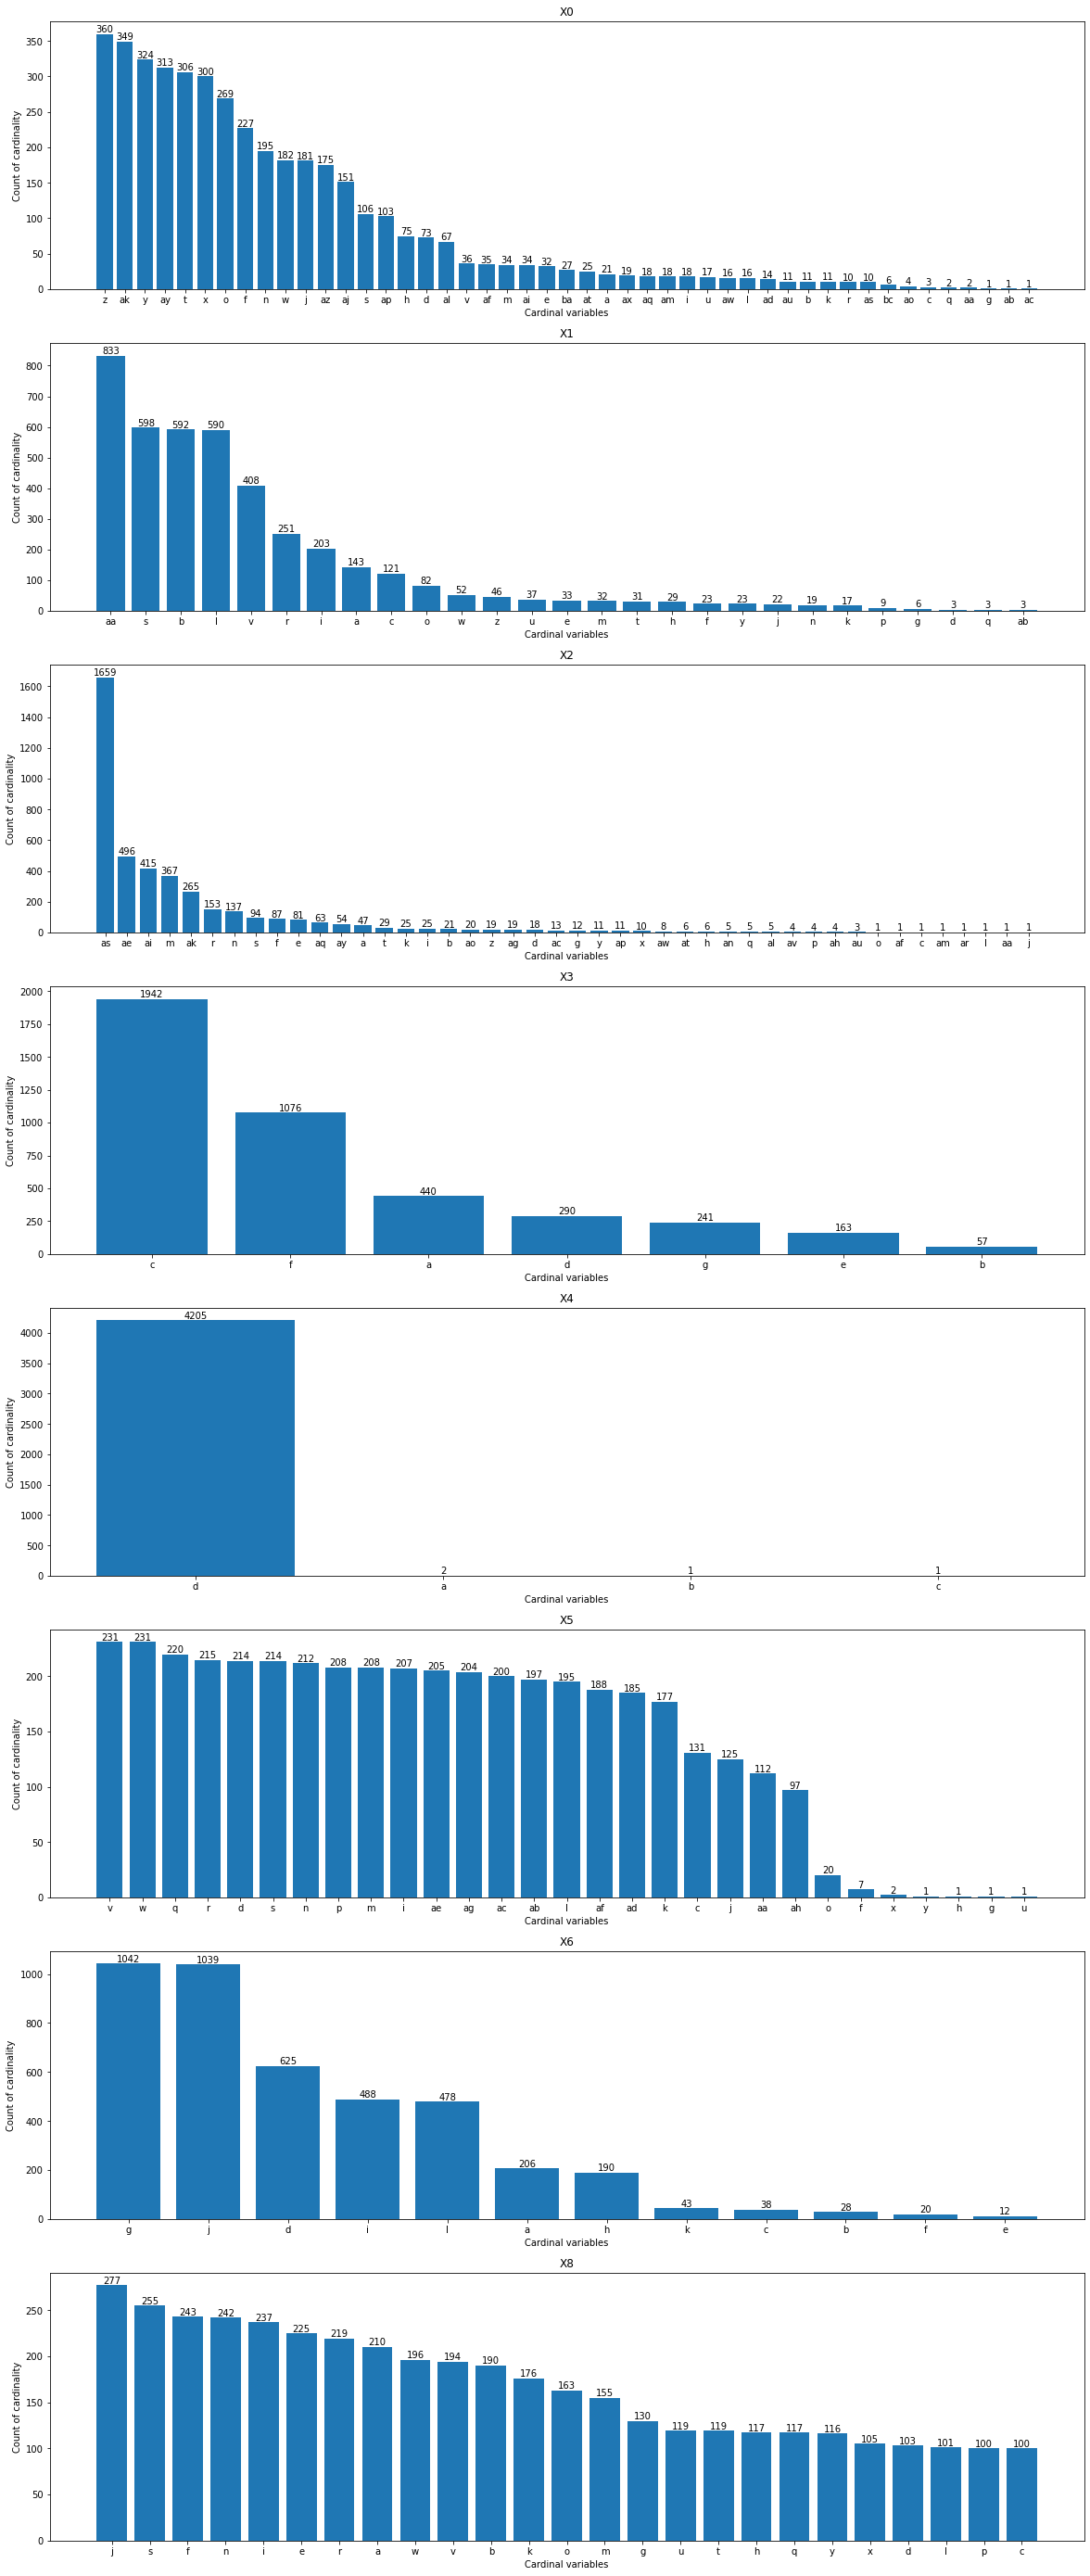

In [ ]:
plt.figure(figsize=(20,50)) # Figure size mentioned
for i in range(len(categorical_features)):
  plt.subplot(8,1,i+1) # Code to create multiple plots together
  x = train_data[categorical_features[i]].value_counts().index # Creating x axis with indices of each feature
  y = train_data[categorical_features[i]].value_counts().values # Creating y axis with cardinal frequency of each category
  plt.bar(x,y) # Creating Bar plot for each categorical feature
  plt.title(categorical_features[i]) # Title for each category
  plt.xlabel('Cardinal variables') # Xlabel
  plt.ylabel('Count of cardinality') # Ylabel
  for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom') # creating annotation referred : https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

**OBSERVATION:**

From the above analysis it was observed that for each categorical feature, the cardinality of all the features differ from each other. Also the frequency of the variables with each feature noticed and observed to be not uniform in nature. From this analysis nature of each categorical feature studied and understood all the features are not the same. Some features like 'X0' have maximum cardinal value like 47 and some features say 'X4' have minimum cardinal value like 4. This shows nature of categorical features varies with each other.

**Analyzing variance of categorical feature with target feature**

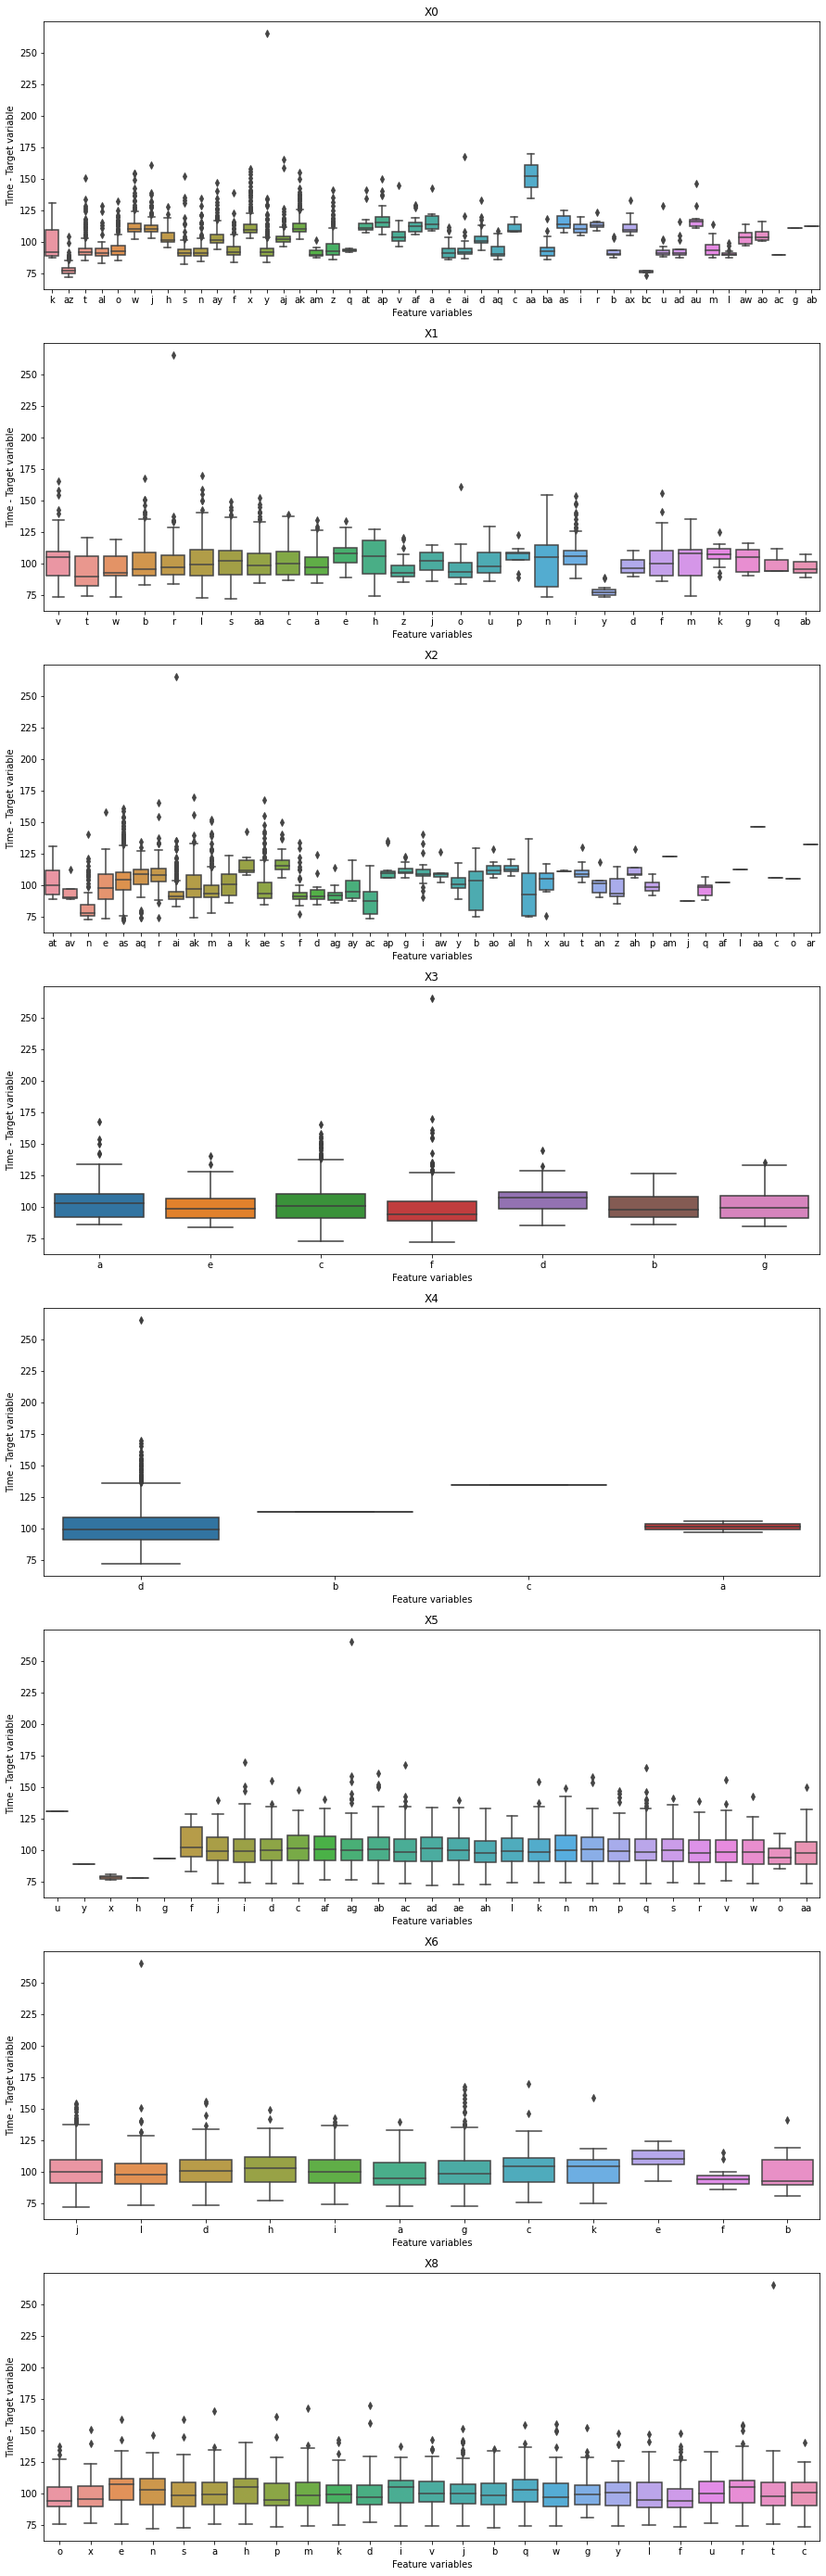

In [ ]:
plt.figure(figsize=(15,50))
for i in range(len(categorical_features)):
  plt.subplot(8,1,i+1)
  sns.boxplot(x=categorical_features[i],y='y',data=train_data)
  plt.title(categorical_features[i])
  plt.xlabel('Feature variables')
  plt.ylabel('Time - Target variable')

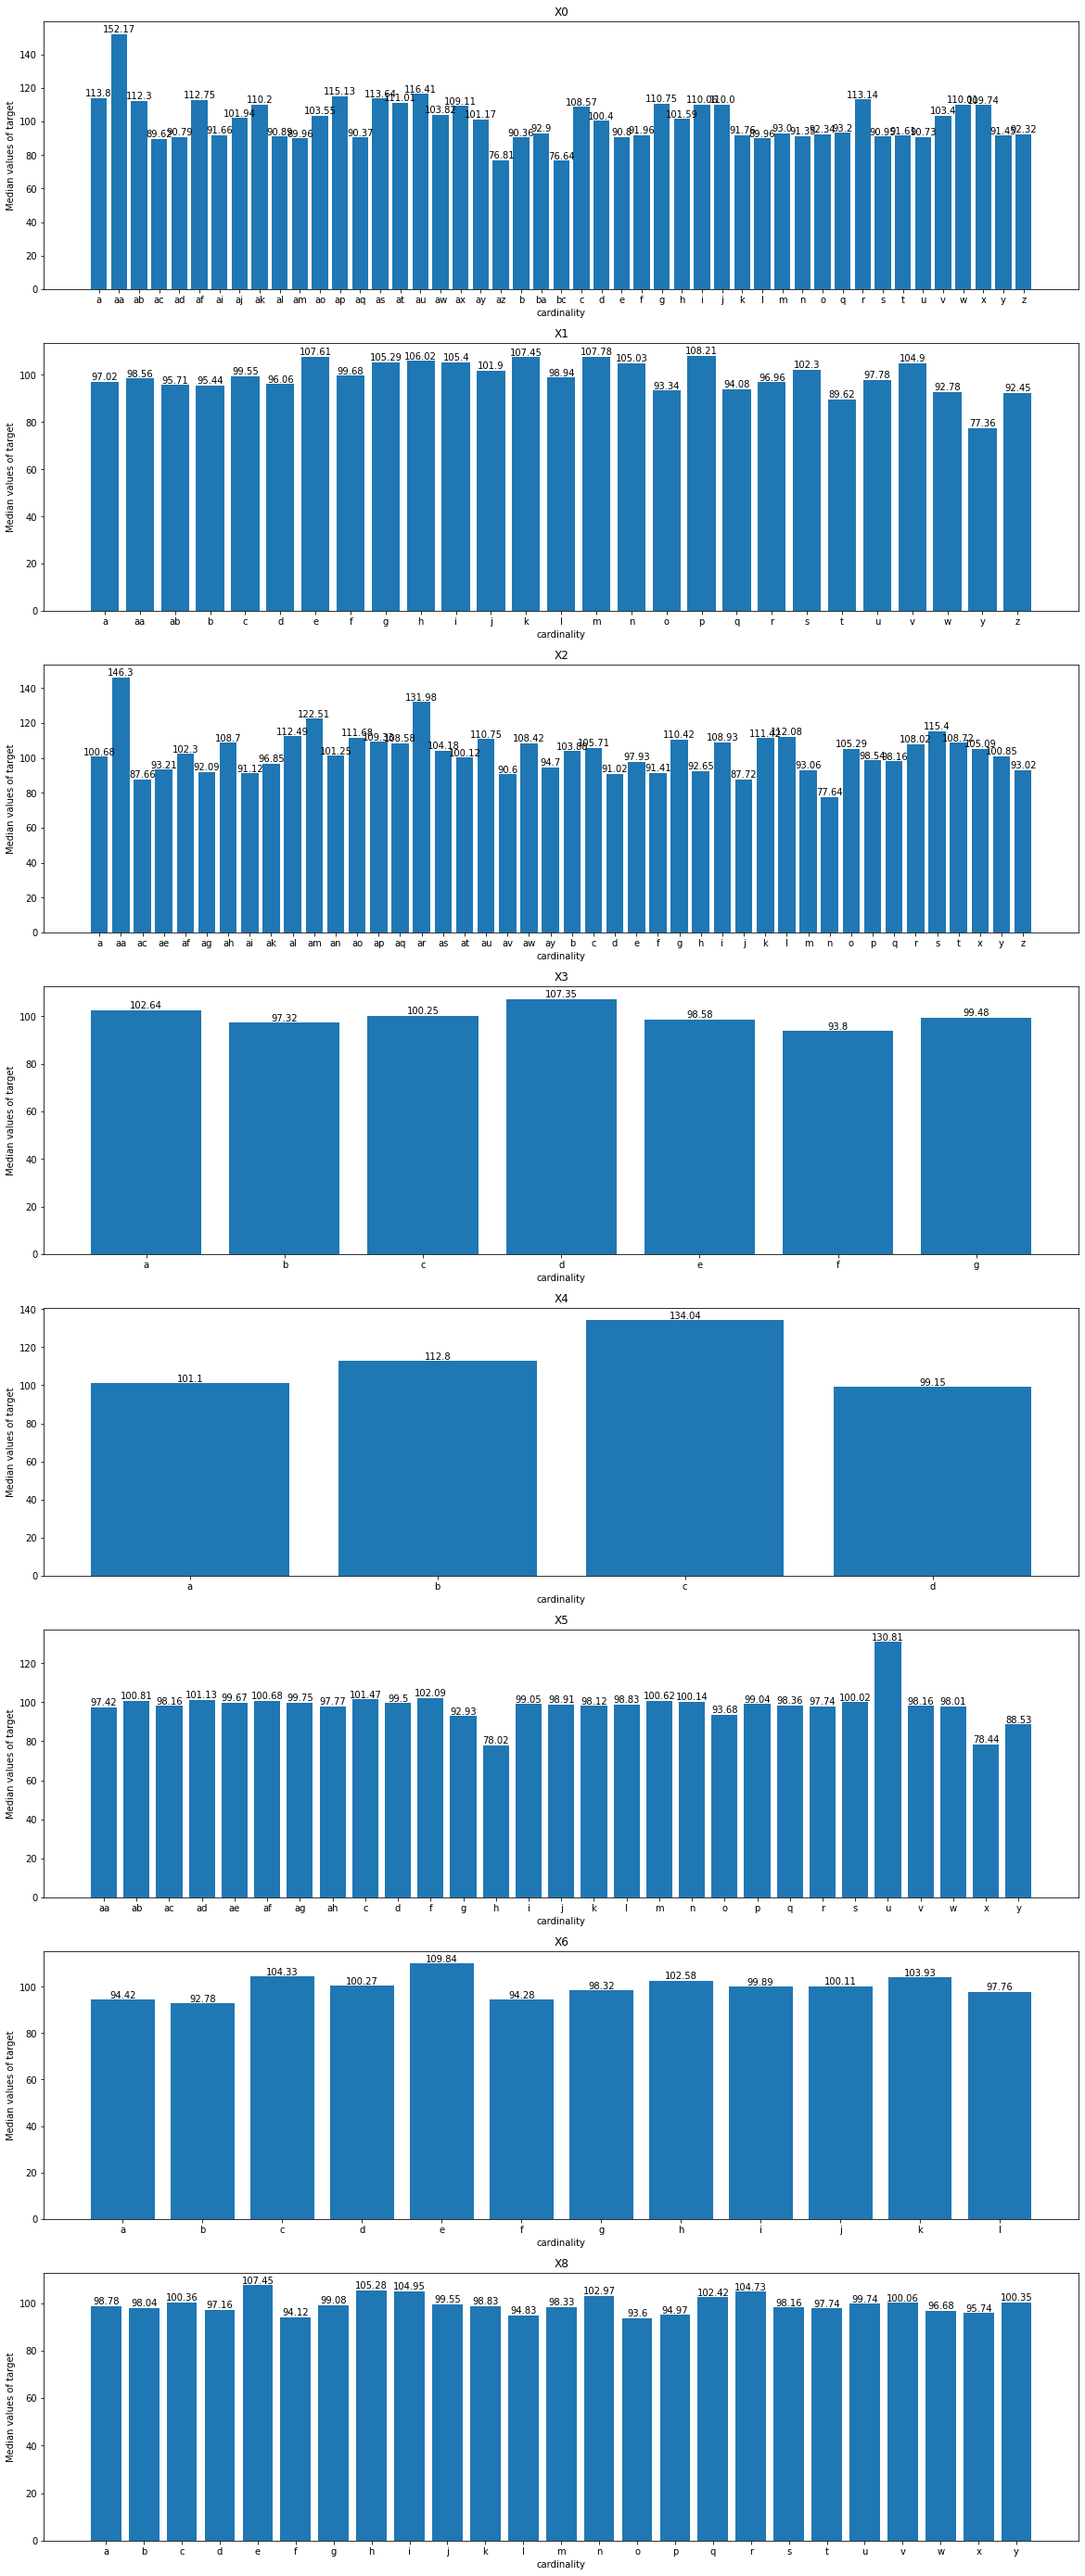

In [ ]:
plt.figure(figsize=(20,50))
for i in range(len(categorical_features)):
  plt.subplot(8,1,i+1)
  x = train_data.groupby(categorical_features[i])['y'].median().index # Each cardinal name computed
  y = train_data.groupby(categorical_features[i])['y'].median().round(2).values # Median valu of target corresponding to each grouped variable
  plt.bar(x,y)
  plt.title(categorical_features[i]) # Title for each category
  plt.xlabel('cardinality') # Xlabel
  plt.ylabel('Median values of target') # Ylabel
  for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')

**OBSERVATION:**

From the analysis between the categorical features and the target variable, it was observed that the features like 'X0' shows good variability among its variables with respect to the target values compared to other features. This signifies that feature 'X0' must posses differentiability to indicate target feature. Whereas in case of feature 'X3' there was no much difference or variability among its variables with respect to target variable. Box plot explains about all the percentile ranges. The bar plot explains corresponding median values of each variable under each feature. This bar plot directly gives insight whether each variable in a feature shows some variance with respect to the target variable or not.

<h1>Exploring numerical features </h1>

In [ ]:
print('Number of numerical features:',len(train_data.columns[train_data.dtypes=='int64'].to_list()))
print()
print('Names of numerical features:',train_data.columns[train_data.dtypes=='int64'].to_list())
numerical_features = train_data.columns[train_data.dtypes=='int64'].to_list()

Number of numerical features: 369

Names of numerical features: ['ID', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', '

In [ ]:
print(train_data['X11'].value_counts().index.values) # Example of exploration
print(train_data['X11'].value_counts().values)

[0]
[4209]


**OBSERVATION:**

From the numerical features it was observed that there are 368 numerical features(binary variables) in the dataset. Some of these features remains constant and contain only same value through out the dataset for all the rows. Example: feature 'X11' contains only 0's throughout 4208 rows in the dataset.

In [ ]:
train_data_num = train_data[numerical_features]
train_data_num

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data_num = test_data.drop(categorical_features,axis=1) # taking out only numerical features
test_data_num

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Treating constant features**

In [ ]:
# Removing constant features 
# Reference :https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/#:~:text=To%20remove%20the%20correlated%20features,the%20columns%20of%20the%20dataframe.

from sklearn.feature_selection import VarianceThreshold # Importing reuired library

var = VarianceThreshold(threshold=0) # Specifying threshold 0, meaning absolutely no variance within the feature
var.fit(train_data_num) # Fitting the train data only with numerical features

VarianceThreshold(threshold=0)

In [ ]:
var.get_support() # Retrieving results from attribute to extract constant feature

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

**OBSERVATION:**

The **get_support()** attribute gives us the features that are constant by specifying them as False. True indicated they are not constant i.e., do not have threshold = 0.

In [ ]:
print('Columns that are not having variance 0:',train_data_num.columns[var.get_support()])
print()
print('Columns that are having variance 0:',train_data_num.columns[var.get_support()==False])
const_feat_1 = train_data_num.columns[var.get_support()==False]

Columns that are not having variance 0: Index(['ID', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=357)

Columns that are having variance 0: Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')


In [ ]:
print('Number of Columns that are having variance 0:',len(const_feat_1))

Number of Columns that are having variance 0: 12


In [ ]:
var2 = VarianceThreshold(threshold=0.001) # Specifying threshold 0.001, meaning 0.001 variance within the feature
var2.fit(train_data_num)

VarianceThreshold(threshold=0.001)

In [ ]:
var2.get_support()  # Retrieving results from attribute to extract constant feature

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
train_data_num['X384'].value_counts() # Example observation

0    4207
1       2
Name: X384, dtype: int64

In [ ]:
print('Columns that are not having variance 0.001:',train_data_num.columns[var2.get_support()])
print()
print('Columns that are having variance 0.001:',train_data_num.columns[var2.get_support()==False])
const_feat_2 = train_data_num.columns[var2.get_support()==False]

Columns that are not having variance 0.001: Index(['ID', 'X10', 'X12', 'X13', 'X14', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X374', 'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383',
       'X385'],
      dtype='object', length=317)

Columns that are having variance 0.001: Index(['X11', 'X15', 'X33', 'X39', 'X40', 'X42', 'X59', 'X74', 'X87', 'X89',
       'X92', 'X93', 'X95', 'X107', 'X110', 'X124', 'X153', 'X167', 'X190',
       'X204', 'X205', 'X207', 'X210', 'X233', 'X235', 'X236', 'X245', 'X252',
       'X257', 'X259', 'X260', 'X268', 'X269', 'X270', 'X278', 'X280', 'X288',
       'X289', 'X290', 'X293', 'X295', 'X296', 'X297', 'X318', 'X319', 'X330',
       'X332', 'X339', 'X347', 'X369', 'X372', 'X384'],
      dtype='object')


In [ ]:
print('Number of Columns that are having variance 0.001:',len(const_feat_2))

Number of Columns that are having variance 0.001: 52


**OBSERVATION:**

1. Initially the binary features are checked for zero variance.

2. Features that have zero variance are considered as constants and they were computed from the train data.

3. Out of **368** numerical features, **12** were zero variance i.e., constant features.

4. Next, features with very less variance (almost zero variance) were also examined and observed that some features like **'X384'** had only 2 data points as binary 1's and remaining 4206 as binary 0's.

5. These kind of quasi-constant features were also observed and they were 52 such features present in the data.

7. All these features are considered to be redundant, which could be removed in order to get better performance and also to reduce the dimensions of the data.

# <font color='red'> <b>Encoding categorical data</b></font>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categorical_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

**Encoding categorical feature : 'X0'**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
# Values that are not present in train but in test are ignored

vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X0'].values.reshape(-1,1))

train_data_X0 = vectorizerOhe.transform(train_data['X0'].values.reshape(-1,1))
test_data_X0 = vectorizerOhe.transform(test_data['X0'].values.reshape(-1,1))

print('Train data shape for X0:',train_data_X0.shape)
print('Test data shape for X0:',test_data_X0.shape)

Train data shape for X0: (4209, 47)
Test data shape for X0: (4209, 47)


**Encoding categorical feature : 'X1'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X1'].values.reshape(-1,1))

train_data_X1 = vectorizerOhe.transform(train_data['X1'].values.reshape(-1,1))
test_data_X1 = vectorizerOhe.transform(test_data['X1'].values.reshape(-1,1))

print('Train data shape for X1:',train_data_X1.shape)
print('Test data shape for X1:',test_data_X1.shape)

Train data shape for X1: (4209, 27)
Test data shape for X1: (4209, 27)


**Encoding categorical feature : 'X2'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X2'].values.reshape(-1,1))

train_data_X2 = vectorizerOhe.transform(train_data['X2'].values.reshape(-1,1))
test_data_X2 = vectorizerOhe.transform(test_data['X2'].values.reshape(-1,1))

print('Train data shape for X2:',train_data_X2.shape)
print('Test data shape for X2:',test_data_X2.shape)

Train data shape for X2: (4209, 44)
Test data shape for X2: (4209, 44)


**Encoding categorical feature : 'X3'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X3'].values.reshape(-1,1))

train_data_X3 = vectorizerOhe.transform(train_data['X3'].values.reshape(-1,1))
test_data_X3 = vectorizerOhe.transform(test_data['X3'].values.reshape(-1,1))

print('Train data shape for X3:',train_data_X3.shape)
print('Test data shape for X3:',test_data_X3.shape)

Train data shape for X3: (4209, 7)
Test data shape for X3: (4209, 7)


**Encoding categorical feature : 'X4'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X4'].values.reshape(-1,1))

train_data_X4 = vectorizerOhe.transform(train_data['X4'].values.reshape(-1,1))
test_data_X4 = vectorizerOhe.transform(test_data['X4'].values.reshape(-1,1))

print('Train data shape for X4:',train_data_X4.shape)
print('Test data shape for X4:',test_data_X4.shape)

Train data shape for X4: (4209, 4)
Test data shape for X4: (4209, 4)


**Encoding categorical feature : 'X5'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X5'].values.reshape(-1,1))

train_data_X5 = vectorizerOhe.transform(train_data['X5'].values.reshape(-1,1))
test_data_X5 = vectorizerOhe.transform(test_data['X5'].values.reshape(-1,1))

print('Train data shape for X5:',train_data_X5.shape)
print('Test data shape for X5:',test_data_X5.shape)

Train data shape for X5: (4209, 29)
Test data shape for X5: (4209, 29)


**Encoding categorical feature : 'X6'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X6'].values.reshape(-1,1))

train_data_X6 = vectorizerOhe.transform(train_data['X6'].values.reshape(-1,1))
test_data_X6 = vectorizerOhe.transform(test_data['X6'].values.reshape(-1,1))

print('Train data shape for X6:',train_data_X6.shape)
print('Test data shape for X6:',test_data_X6.shape)

Train data shape for X6: (4209, 12)
Test data shape for X6: (4209, 12)


**Encoding categorical feature : 'X8'**

In [ ]:
vectorizerOhe = OneHotEncoder(handle_unknown='ignore') 
vectorizerOhe.fit(train_data['X8'].values.reshape(-1,1))

train_data_X8 = vectorizerOhe.transform(train_data['X8'].values.reshape(-1,1))
test_data_X8 = vectorizerOhe.transform(test_data['X8'].values.reshape(-1,1))

print('Train data shape for X8:',train_data_X8.shape)
print('Test data shape for X8:',test_data_X8.shape)

Train data shape for X8: (4209, 25)
Test data shape for X8: (4209, 25)


**Concatenating all the categorical features**

In [ ]:
train_data_cato = hstack((train_data_X1,train_data_X2,train_data_X3,train_data_X4,train_data_X5,train_data_X6,train_data_X8)).tocsr()
test_data_cato = hstack((test_data_X1,test_data_X2,test_data_X3,test_data_X4,test_data_X5,test_data_X6,test_data_X8)).tocsr()

print("Shape of categorical data after One Hot Encoding")
print()
print('Shape of categorical train data:',train_data_cato.shape)
print('Shape of categorical test data:',test_data_cato.shape)

Shape of categorical data after One Hot Encoding

Shape of categorical train data: (4209, 148)
Shape of categorical test data: (4209, 148)


In [ ]:
train_data_catogorical = pd.DataFrame(train_data_cato.toarray()) # Converting sparse matrix to dataframe
train_data_catogorical = train_data_catogorical.astype(int) # Converting all float type to int
train_data_catogorical

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
test_data_catogorical = pd.DataFrame(test_data_cato.toarray()) # Converting sparse matrix to dataframe
test_data_catogorical = test_data_catogorical.astype(int) # Converting all float type to int
test_data_catogorical

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_data_num

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data_num

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,8411,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8413,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,8414,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Concatenating both categorical and numerical dataset**

In [ ]:
X_train = pd.concat([train_data_catogorical,train_data_num],axis=1)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = pd.concat([test_data_catogorical,test_data_num],axis=1)
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# <font color='red'> <b>NOTE:</b></font>

From the above experiments and observations, the data have outliers, constant features, correlated features. But a **first cut model** is to be tried out without removing any of them from the train and test data set and performance to be checked.

Later models performance to be checked by removing constant features, then removing correlated features , then feature constructions and feature selection techniques.

All these are to be experimented one after the other and check the models performance simultaneously and get a better conclusion.

**Metrics:**

In this problem statement, MSLE - Mean Square Log Error and R² - R Squared error to be used.

**MSLE** - Very robust in presence of outliers. If the testing time taken by any car in between cars shoot up very high, which in that case could behave as an outlier. Since MSLE uses log to compute the performance, it is very robust to outliers. Its ideal value is **0**.
Its computed like mean(sum of squares of (log of actual-log of predicted))

**R²** - Computes fraction between the sum of squares of residual and sum of sqaures as (1 - (SSR/SST)) . SSR - Sum of squares with residual, SST - Sum of sqaures with mean. Its ideal value is **1**

In [ ]:
# Reference : https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html

from sklearn.metrics import mean_squared_log_error

**MSLE - Mean Squared Log Error**

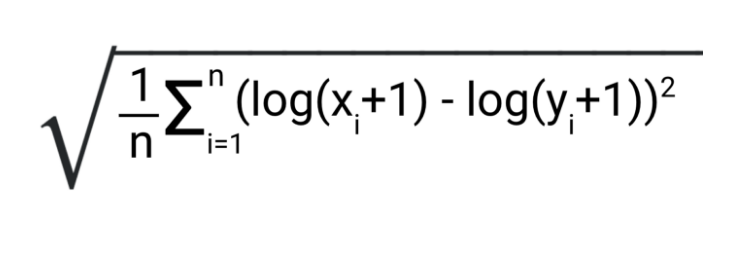

**R² squared error**

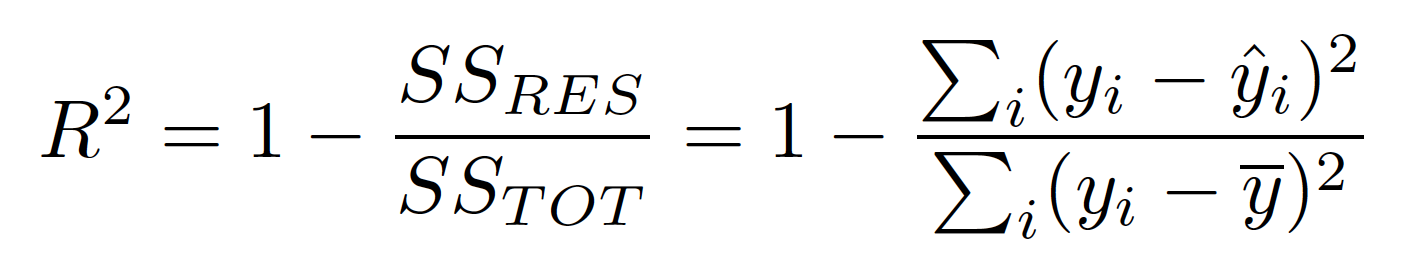

In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# <font color='red'> <b>First Cut Model-1</b></font>

In [ ]:
alpha = [10 ** x for x in range(-5, 4)] # Hyperparameter values
alpha

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial1 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial1.fit(X_train,Y)
Y_pred_linear_regSGD_trial1 = linear_regSGD_trial1.predict(X_train)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y,Y_pred_linear_regSGD_trial1)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: -4.524144309226926e+29


In [ ]:
cv_score_11 = cross_val_score(linear_regSGD_trial1,X_train,Y,cv=5,scoring='r2')
print('Cross-validation score using SGD reg regressor:',np.mean(cv_score_11))

Cross-validation score using SGD reg regressor: -2.0685227364125153e+29


**Random Forest Regressor**

In [ ]:
reg_RForest_trial1 = RandomForestRegressor(random_state=42)
reg_RForest_trial1.fit(X_train,Y)
Y_pred_reg_RForest_trial1 = reg_RForest_trial1.predict(X_train)
print('R² value of TRAIN data with Random forest:',r2_score(Y,Y_pred_reg_RForest_trial1))

R² value of TRAIN data with Random forest: 0.9295712478114713


In [ ]:
cv_score_111 = cross_val_score(reg_RForest_trial1,X_train,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_111))

Cross-validation score using RF regressor: -0.1352712572349698


**XGBoost Regressor**

In [ ]:
reg_XGB_trial1 = XGBRegressor(random_state=42)
reg_XGB_trial1.fit(X_train,Y)
Y_pred_reg_XGB_trial1 = reg_XGB_trial1.predict(X_train)
print('R² value of TRAIN data with XGBoost:',r2_score(Y,Y_pred_reg_XGB_trial1)) # R² value

[06:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6230542676875319


In [ ]:
cv_score_1111 = cross_val_score(reg_XGB_trial1,X_train,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_1111))

[06:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.5108734175504892


In [ ]:
from prettytable import PrettyTable

table1 = PrettyTable()
table1.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table1.add_row(["Linear regression-SGD","R²",r2_score(Y,Y_pred_linear_regSGD_trial1),np.mean(cv_score_11)])
table1.add_row(["RF regression","R²",r2_score(Y,Y_pred_reg_RForest_trial1),np.mean(cv_score_111)])
table1.add_row(["XGB regression","R²",r2_score(Y,Y_pred_reg_XGB_trial1),np.mean(cv_score_1111)])

print('Table:1 - Data without any feature engineering')
print(table1)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+


**OBSERVATION:**

In the above experiment first cut models were tried out. From observing the performance of the models, linear regression models suffers a lot and performs poorly. But in case of random forest and Xgboost the performance is slightly better. Out of all the models Xgboost performs way better than others. The data contains constant features, correlated features which are redundant and very high dimensions of data. 

In next step, removing redundant features and trying out models and checking its performance would be experimented.

# <font color='red'> <b>Removing constant features</b></font>

In [ ]:
# Removing redundant features

X_train2 = X_train.drop(const_feat_2,axis=1) # Removing features that have zero variance also features with 0.001 variance
X_train2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X385
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_test2 = X_test.drop(const_feat_2,axis=1) # Removing features that have zero variance also features with 0.001 variance
X_test2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X385
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# <font color='red'> <b>First Cut Model-2</b></font>

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial2 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial2.fit(X_train2,Y)
Y_pred_linear_regSGD_trial2 = linear_regSGD_trial2.predict(X_train2)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y,Y_pred_linear_regSGD_trial2)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: -4.562559881349168e+29


In [ ]:
cv_score_22 = cross_val_score(linear_regSGD_trial2,X_train2,Y,cv=5,scoring='r2')
print('Cross-validation score using SGD reg regressor:',np.mean(cv_score_22))

Cross-validation score using SGD reg regressor: -2.0357301897112474e+29


**Random Forest Regressor**

In [ ]:
reg_RForest_trial2 = RandomForestRegressor(random_state=42)
reg_RForest_trial2.fit(X_train2,Y)
Y_pred_reg_RForest_trial2 = reg_RForest_trial2.predict(X_train2)
print('R² value of TRAIN data with Random forest:',r2_score(Y,Y_pred_reg_RForest_trial2))

R² value of TRAIN data with Random forest: 0.9294254197551347


In [ ]:
cv_score_222 = cross_val_score(reg_RForest_trial2,X_train2,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_222))

Cross-validation score using RF regressor: -0.06307938296088969


**XGBoost Regressor**

In [ ]:
reg_XGB_trial2 = XGBRegressor(random_state=42)
reg_XGB_trial2.fit(X_train2,Y)
Y_pred_reg_XGB_trial2 = reg_XGB_trial2.predict(X_train2)
print('R² value of TRAIN data with XGBoost:',r2_score(Y,Y_pred_reg_XGB_trial2)) # R² value

[07:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6349910728359538


In [ ]:
cv_score_2222 = cross_val_score(reg_XGB_trial2,X_train2,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_2222))

[07:27:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.5043796043938107


In [ ]:
from prettytable import PrettyTable

table2 = PrettyTable()
table2.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table2.add_row(["Linear regression-SGD","R²",r2_score(Y,Y_pred_linear_regSGD_trial2),np.mean(cv_score_22)])
table2.add_row(["RF regression","R²",r2_score(Y,Y_pred_reg_RForest_trial2),np.mean(cv_score_222)])
table2.add_row(["XGB regression","R²",r2_score(Y,Y_pred_reg_XGB_trial2),np.mean(cv_score_2222)])

print('Table:1 - Data without any feature engineering')
print(table1)
print()
print('Table:2 - Data with constant and quasi-contant features removed')
print(table2)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+

Table:2 - Data with constant and quasi-contant features removed
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   

**OBSERVATION:**

There was no much difference in performance between removing constant features. In next step correlated features are to be removed and performace to be checked.

**Treating correlation features**

In [ ]:
X_train2.iloc[:,-317:]

,ID,X10,X12,X13,X14,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X34,X35,X36,X37,X38,X41,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,...,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X385
0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4205,8406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4206,8412,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4207,8415,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
cor_matrix = X_train2.iloc[:,-317:].corr() # Creating a matrix 
cor_matrix

,ID,X10,X12,X13,X14,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X34,X35,X36,X37,X38,X41,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,...,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X370,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X385
ID,1.000000,0.001602,0.058988,-0.031917,-0.025438,-0.036480,-0.038171,-0.027063,-0.012762,0.063216,-0.029946,-0.096610,-0.010612,-0.008972,-0.048634,0.004214,0.030967,0.004175,0.015264,-0.040157,0.013217,-0.008026,-0.040157,0.011691,-0.040157,0.256003,-0.013301,0.020923,-0.074500,-0.026850,0.012121,-0.034911,0.017011,-0.005676,0.040512,0.035067,0.022614,0.089264,0.000675,-0.006147,...,-0.003174,0.007344,-0.087157,0.008597,0.056042,0.038989,-0.016616,0.062800,-0.045819,-0.044807,0.032370,-0.039983,0.000065,0.041805,-0.038715,-0.021326,-0.016827,-0.033066,0.040947,-0.028955,0.032658,0.039679,-0.063217,-0.063217,-0.016526,0.037122,0.006228,0.087520,0.002822,0.005930,0.014103,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,0.029059
X10,0.001602,1.000000,-0.033084,-0.028806,-0.100474,-0.005944,-0.010164,-0.010323,-0.038610,-0.047393,-0.005944,-0.035836,-0.016870,-0.005067,-0.008223,0.070276,-0.021300,-0.024615,-0.007820,-0.044248,-0.012340,-0.008608,-0.044248,-0.007820,-0.044248,-0.021539,-0.012472,0.400164,-0.012472,-0.062859,-0.124508,0.005188,-0.017551,-0.036977,-0.055547,0.067466,0.037420,-0.009672,-0.024757,-0.008417,...,-0.010479,0.052615,-0.033870,-0.010785,-0.017551,-0.025936,0.027401,-0.025179,-0.083122,-0.070980,-0.027790,-0.005375,-0.053430,0.139665,-0.048979,-0.004005,-0.100230,-0.021057,-0.033422,0.021777,0.111496,0.056725,-0.006209,-0.006209,-0.004005,-0.027139,-0.030039,-0.009503,-0.013964,-0.016266,-0.062993,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.004387
X12,0.058988,-0.033084,1.000000,0.214825,-0.246513,-0.014584,-0.024937,-0.025327,-0.094730,-0.116280,-0.014584,-0.087924,-0.041391,-0.012433,-0.020175,0.184599,-0.052259,-0.042617,-0.019185,-0.126861,-0.030276,-0.021119,-0.126861,-0.019185,-0.126861,0.017543,-0.030600,-0.079493,-0.030600,0.033104,-0.054680,-0.032480,-0.043061,-0.086986,-0.106926,-0.018278,-0.046429,-0.023731,-0.034216,-0.020652,...,0.004506,-0.043061,-0.076391,-0.006881,0.085073,-0.063635,0.067229,-0.061776,-0.194416,-0.151745,-0.068182,-0.013189,0.255318,-0.037512,-0.046559,-0.009826,0.085827,-0.051664,0.236848,-0.210335,-0.083772,0.093726,-0.015234,-0.015234,-0.009826,-0.066587,-0.062547,-0.023315,-0.034261,0.176659,0.097125,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.010765
X13,-0.031917,-0.028806,0.214825,1.000000,-0.083141,-0.012698,-0.021713,-0.010525,-0.082482,-0.043126,0.007215,0.226530,-0.036040,-0.010825,-0.017566,0.110191,-0.039773,-0.052586,-0.016705,-0.095558,-0.026362,-0.018388,-0.095558,-0.016705,-0.095558,-0.029005,-0.026644,-0.065287,-0.026644,-0.128106,-0.030554,0.007856,-0.037493,-0.055262,0.004383,-0.043370,-0.042025,-0.020663,-0.052889,-0.017982,...,-0.022386,-0.037493,-0.057226,-0.023041,-0.037493,-0.055408,0.053988,-0.053789,-0.076614,0.150106,-0.059367,-0.011483,0.130177,-0.192270,-0.116168,-0.008555,0.283290,0.007134,0.341697,0.046522,-0.258361,0.056781,0.005803,0.005803,0.020960,-0.057978,-0.047400,-0.020301,-0.029832,-0.034749,-0.134572,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,-0.009373
X14,-0.025438,-0.100474,-0.246513,-0.083141,1.000000,-0.044291,0.012713,-0.076916,-0.287691,-0.353137,-0.044291,-0.267021,-0.125703,-0.004686,-0.061270,0.126863,-0.158707,-0.076904,-0.058265,-0.313459,-0.091947,-0.064136,-0.313459,-0.058265,-0.313459,0.061752,0.124132,-0.091170,-0.092931,-0.088756,-0.471226,0.114690,-0.130773,-0.171664,0.030734,0.415034,-0.043440,-0.072069,-0.078518,-0.062719,...,0.072112,-0.111276,0.031647,-0.054294,-0.101528,0.222029,0.204170,0.204227,0.108029,0.340823,0.

In [ ]:
cor_features = set() # To store the correlated features without duplication since calculating values standing in same column along row wise
for i in range(len(cor_matrix.columns)):
  for j in range(i):
    if abs(cor_matrix.iloc[i, j]) >= 0.9: # Correlation threshold of 90%
      cor_features.add(cor_matrix.columns[i])

In [ ]:
print('Number of correlated features in numerical data of train dataset:',len(cor_features))

Number of correlated features in numerical data of train dataset: 92


In [ ]:
# Removing correlated features from the train data set

X_train3 = X_train2.drop(cor_features,axis=1)
X_train3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X313,X315,X316,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Removing correlated and duplicate features from test data that where computed using train dataset

X_test3 = X_test2.drop(cor_features,axis=1)
X_test3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X313,X315,X316,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


**OBSERVATION:**

1. The above analysis wih respect to correlated features of the binary variables are to observe whether any two features are almost similar to each other.

2. Almost similar or exactly same features do not carry any additional information or contribute to the model being buld. So any two features which are same to be identified and one among them to be removed from the data.

3. Thus correlation between the pairs of binary features calculated and those pairs of binary features with correlation more than **90%** are identified and removed.

4. From this analysis it was observed that almost **96** features were found as more correlated among features and they are removed.

5. This methodology also removes **duplicate** features, since correlation more than 90% is given as threshold. So features that are actually duplicate will have correlation of **100%**.

6. Similarly those features that where found redundant using correlation must be removed also in test data.

# <font color='red'> <b>First Cut Model-3</b></font>

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial3 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial3.fit(X_train3,Y)
Y_pred_linear_regSGD_trial3 = linear_regSGD_trial3.predict(X_train3)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y,Y_pred_linear_regSGD_trial3)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: -4.5215481204957284e+29


In [ ]:
cv_score_33 = cross_val_score(linear_regSGD_trial3,X_train3,Y,cv=5,scoring='r2')
print('Cross-validation score using SGD reg regressor:',np.mean(cv_score_33))

Cross-validation score using SGD reg regressor: -2.4052642075916148e+29


**Random Forest Regressor**

In [ ]:
reg_RForest_trial3 = RandomForestRegressor(random_state=42)
reg_RForest_trial3.fit(X_train3,Y)
Y_pred_reg_RForest_trial3 = reg_RForest_trial3.predict(X_train3)
print('R² value of TRAIN data with Random forest:',r2_score(Y,Y_pred_reg_RForest_trial3))

R² value of TRAIN data with Random forest: 0.929442933916302


In [ ]:
cv_score_333 = cross_val_score(reg_RForest_trial3,X_train3,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_333))

Cross-validation score using RF regressor: -0.08433630834368082


**XGBoost Regressor**

In [ ]:
reg_XGB_trial3 = XGBRegressor(random_state=42)
reg_XGB_trial3.fit(X_train3,Y)
Y_pred_reg_XGB_trial3 = reg_XGB_trial3.predict(X_train3)
print('R² value of TRAIN data with XGBoost:',r2_score(Y,Y_pred_reg_XGB_trial3)) # R² value

[07:34:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6330534689745343


In [ ]:
cv_score_3333 = cross_val_score(reg_XGB_trial3,X_train3,Y,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_3333))

[07:34:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:35:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.5237426850249893


In [ ]:
from prettytable import PrettyTable

table3 = PrettyTable()
table3.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table3.add_row(["Linear regression-SGD","R²",r2_score(Y,Y_pred_linear_regSGD_trial3),np.mean(cv_score_33)])
table3.add_row(["RF regression","R²",r2_score(Y,Y_pred_reg_RForest_trial3),np.mean(cv_score_333)])
table3.add_row(["XGB regression","R²",r2_score(Y,Y_pred_reg_XGB_trial3),np.mean(cv_score_3333)])

print('Table:1 - Data without any feature engineering')
print(table1)
print()
print('Table:2 - Data with constant and quasi-contant features removed')
print(table2)
print()
print('Table:3 - Data with correlated features removed')
print(table3)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+

Table:2 - Data with constant and quasi-contant features removed
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   

**OBSERVATION:**

There was no much difference in performance between removing constant features. In next step outliers to be removed and performance to be checked again.

In [ ]:
# From EDA, the outlier in row 883
X_train4 = X_train3.drop([883]) # Removing the outlier in the train data specifying the row index value(883)

In [ ]:
X_train4 = X_train4.reset_index(drop=True)
X_train4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X313,X315,X316,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
Y4 = Y.tolist()
len(Y4)

4209

In [ ]:
Y4.pop(883) # Removing outlier from target

265.32

In [ ]:
Y4 = np.array(Y4)
len(Y4)

4208

# <font color='red'> <b>First Cut Model-4</b></font>

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial4 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial4.fit(X_train4,Y4)
Y_pred_linear_regSGD_trial4 = linear_regSGD_trial4.predict(X_train4)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y4,Y_pred_linear_regSGD_trial4)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: -5.009644233032702e+28


In [ ]:
cv_score_44 = cross_val_score(linear_regSGD_trial4,X_train4,Y4,cv=5,scoring='r2')
print('Cross-validation score R² using SGD reg regressor:',np.mean(cv_score_44))

Cross-validation score R² using SGD reg regressor: -4.556315587394821e+29


**Random Forest Regressor**

In [ ]:
reg_RForest_trial4 = RandomForestRegressor(random_state=42)
reg_RForest_trial4.fit(X_train4,Y4)
Y_pred_reg_RForest_trial4 = reg_RForest_trial4.predict(X_train4)
print('R² value of TRAIN data with Random forest:',r2_score(Y4,Y_pred_reg_RForest_trial4))

R² value of TRAIN data with Random forest: 0.9376108449283945


In [ ]:
cv_score_444 = cross_val_score(reg_RForest_trial4,X_train4,Y4,cv=5,scoring='r2')
print('Cross-validation score R² using RF regressor:',np.mean(cv_score_444))

Cross-validation score R² using RF regressor: 0.43585944305030494


**XGBoost Regressor**

In [ ]:
reg_XGB_trial4 = XGBRegressor(random_state=42)
reg_XGB_trial4.fit(X_train4,Y4)
Y_pred_reg_XGB_trial4 = reg_XGB_trial4.predict(X_train4)
print('R² value of TRAIN data with XGBoost:',r2_score(Y4,Y_pred_reg_XGB_trial4)) # R² value

[07:49:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6471986610403053


In [ ]:
cv_score_4444 = cross_val_score(reg_XGB_trial4,X_train4,Y4,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_4444))

[07:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:49:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.5668715192535133


In [ ]:
from prettytable import PrettyTable

table4 = PrettyTable()
table4.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table4.add_row(["Linear regression-SGD","R²",r2_score(Y4,Y_pred_linear_regSGD_trial4),np.mean(cv_score_44)])
table4.add_row(["RF regression","R²",r2_score(Y4,Y_pred_reg_RForest_trial4),np.mean(cv_score_444)])
table4.add_row(["XGB regression","R²",r2_score(Y4,Y_pred_reg_XGB_trial4),np.mean(cv_score_4444)])


print('Table:1 - Data without any feature engineering')
print(table1)
print()
print('Table:2 - Data with constant and quasi-contant features removed')
print(table2)
print()
print('Table:3 - Data with correlated features removed')
print(table3)
print()
print('Table:4 - Data with outlier removed')
print(table4)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+

Table:2 - Data with constant and quasi-contant features removed
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   

**OBSERVATION:**

Removing outliers showed a good difference in the ensemble models random forest and Xgboost. Thus removing outliers is to be considered.

Moving forward, including important features to be performed. New features to be generated and checked for performance of the model.

In [ ]:
target = pd.DataFrame()
target['y'] = Y4

**Creating iteractive features**

In [ ]:
X_train4.iloc[:,148:]

,X10,X12,X13,X14,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X34,X36,X38,X41,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X55,X56,X57,X58,X60,...,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166,cluster
0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,3
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,4
4205,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4206,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,5


In [ ]:
inter_cols = X_train4.iloc[:,148:].columns # Considering only the numerical columns

fea = [] # Storing interactive features that have correlation more than 60% with target
cval = [] # Storing correlation values
for i in range(len(inter_cols)):
  for j in range(i+1,len(inter_cols)):
    interaction = X_train4[inter_cols[i]]+X_train4[inter_cols[j]] # Using Addition as interaction
    correlation = interaction.corr(target['y']) # Computing correlation 
    if abs(correlation)>=0.6:
      fea.append(inter_cols[i]+'+'+inter_cols[j])
      cval.append(abs(correlation))

In [ ]:
fea = np.array(fea) # Converting list to array
cval = np.array(cval) # Converting list to array

order = np.argsort(cval)[::-1] # Computing indices of correlation values in decreasing order
interactive_fea = fea[order] # Features in importance order
interactive_vals = cval[order] # Correlation values in decreasing order
print('Interactive features importance order:',interactive_fea)
print()
print('Correlation values of interative features:',interactive_vals)

Interactive features importance order: ['X29+X127' 'X261+X315' 'X127+X166' 'X118+X261' 'X126+X261' 'X261+X275'
 'X221+X261' 'X255+X261' 'X62+X261' 'X47+X261' 'X237+X261' 'X261+X312'
 'X53+X261' 'X28+X127' 'X261+X344' 'X261+X309' 'X261+X267' 'X261+X317'
 'X261+X282' 'X261+X306' 'X261+X281' 'X261+X308' 'X48+X261' 'X261+X383'
 'X52+X261' 'X57+X261' 'X82+X261' 'X184+X261' 'X104+X261' 'X170+X261'
 'X65+X261' 'X44+X261' 'X21+X261' 'X160+X261' 'X123+X261' 'X261+X366'
 'X83+X261' 'X240+X261' 'X145+X261' 'X261+X357' 'X16+X261' 'X24+X261'
 'X261+X341' 'X60+X261' 'X112+X261' 'X261+X307' 'X67+X261' 'X165+X261'
 'X34+X261' 'X183+X261' 'X91+X261' 'X86+X261' 'X261+X353' 'X131+X261'
 'X105+X261']

Correlation values of interative features: [0.68332535 0.66438572 0.64636507 0.62770447 0.62236596 0.62153092
 0.62018242 0.61449143 0.61401488 0.61375194 0.61306457 0.61291066
 0.61245489 0.61230422 0.61187274 0.61141933 0.61075909 0.6097762
 0.60891914 0.60733125 0.60671713 0.60654108 0.60643851 0.60616896

In [ ]:
print('Top 3 interactive feature combinations:',interactive_fea[:3])

Top 3 interactive feature combinations: ['X29+X127' 'X261+X315' 'X127+X166']


In [ ]:
# Computing interactions in train dataset

X_train4['X29_X127'] = X_train4['X29']+X_train4['X127']
X_train4['X261_X315'] = X_train4['X261']+X_train4['X315']
X_train4['X127_X166'] = X_train4['X127']+X_train4['X166']

In [ ]:
X_test4 = X_test3

In [ ]:
# Computing interactions in test dataset

X_test4['X29_X127'] = X_test4['X29']+X_test4['X127']
X_test4['X261_X315'] = X_test4['X261']+X_test4['X315']
X_test4['X127_X166'] = X_test4['X127']+X_test4['X166']

In [ ]:
X_train4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
X_test4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
X_train4 = X_train4.drop(['ID'],axis=1)
X_train4 # Train features after constructing new features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
X_test4 = X_test4.drop(['ID'],axis=1)
X_test4 # Test features after constructing new features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X317,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Clustering as other feature construction

from sklearn.cluster import KMeans # Importing library

lst = []
clusters = [4,6,8,10,12] # Clusters
for i in clusters:
  kmeans = KMeans(n_clusters=i,random_state=0).fit(X_train4.values)  # Computing K-Means algorithm
  labels = list(kmeans.labels_) # List of labels with respect to clusters
  lst.append(labels)

In [ ]:
cluster_df = pd.DataFrame() # Creating new dataframe to store only cluster features

In [ ]:
for i in range(len(lst)):
  cluster_df[i] = lst[i] # Creating cluster features

In [ ]:
cluster_df # Dataframe only with cluster feature

,0,1,2,3,4
0,1,4,0,0,6
1,1,3,5,1,3
2,0,1,1,1,10
3,0,1,4,4,10
4,0,1,4,4,10
...,...,...,...,...,...
4203,2,0,7,7,4
4204,0,4,0,0,6
4205,1,0,1,1,0
4206,0,5,4,4,9


In [ ]:
# Computing correlation of cluster features with different cluster sizes

cval_cluster = []
for i in cluster_df.columns:
  cls_corr = cluster_df[i].corr(target['y'])
  cval_cluster.append(cls_corr)

In [ ]:
cval_cluster

[0.17804888270510297,
 -0.20273481776474,
 -0.023583583767373274,
 0.04631439159943567,
 -0.1960499763949872]

In [ ]:
cluster_fea_train = cluster_df.iloc[:,1].values # New cluster feature train
cluster_fea_train

array([4, 3, 1, ..., 0, 5, 3])

In [ ]:
# Similarly cluster feature to be created in test data set

kmeans_test = KMeans(n_clusters=6,random_state=0).fit(X_test4.values)  # Computing K-Means algorithm
labels_test = list(kmeans_test.labels_) # List of labels with respect to clusters

In [ ]:
cluster_df_test = pd.DataFrame()
cluster_df_test['cluster_fea_test'] = labels_test
cluster_fea_test = cluster_df_test['cluster_fea_test'].values # New cluster feature test

**Cluster feature**

In [ ]:
X_train4['cluster'] = cluster_fea_train
X_test4['cluster'] = cluster_fea_test

In [ ]:
X_train4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,4
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,5


In [ ]:
X_test4

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,X321,X322,X323,X325,X327,X329,X331,X333,X334,X335,X336,X338,X340,X341,X342,X343,X344,X345,X349,X350,X351,X353,X354,X355,X356,X357,X359,X361,X366,X373,X374,X375,X376,X377,X380,X383,X29_X127,X261_X315,X127_X166,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,4
4205,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,2
4206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1
4207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,4


**Summary:**

1. Feature engineering carried out to construct new features using existing features.

2. First method was to use feature interaction between numerical features. Here only numerical features were used and not categorical features.

3. Reason why categorical features were not used was, after encoding, the features formed using categorical have been split according to its cardinality.

4. So columns present in categorical features after encoding do not actually represent a feature. Whereas in numerical features, each column represent actual features.

5. Pairs of features using numerical features were formed and its correlation with target computed.

6. Top 5 interactive features having higher correlation compared to other combinations were selected.

7. Next, new feature created using clustering technique. Where tuning of number of clusters were done.

8. Cluster number selected by computing correlation with target feature.

9. Finally new features added to train and test dataset.

**Feature selection methods:**

**Method : Feature selection using models and other techniques**

Since our data set is sparse, removing features that are very less important for our model will help to reduce overfitting issues. In this case computing important features plays major role to reduce unwanted features from our data. Computing important features can be done in various ways such as, using RandomForest model. forward feature selection, backward feature selection, exhaustive feature selection, recursive feature elimination and recursive feature elimination with cross validation.

**Feature selection : RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Importing library

fs1 = RandomForestRegressor(random_state=0,n_jobs=-1)
fs1.fit(X_train4,Y4)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
features = X_train4.columns

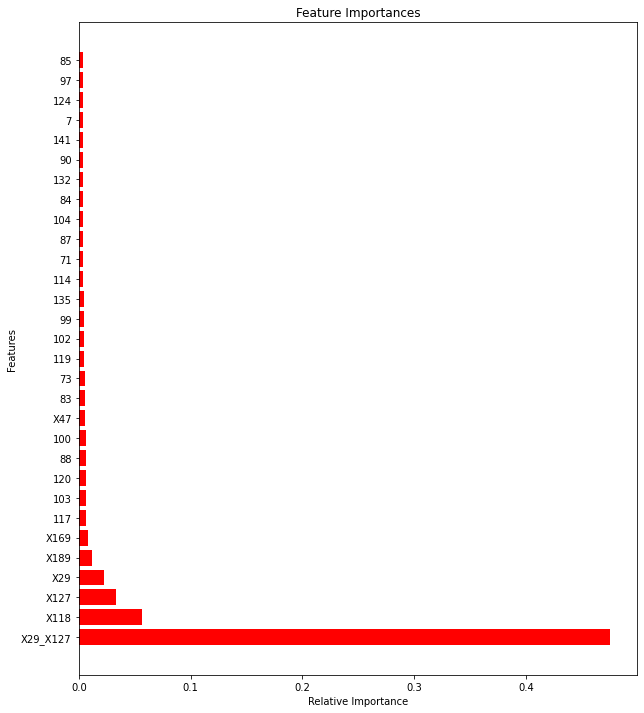

In [ ]:
importance_value = fs1.feature_importances_ # values
imp_fea = np.argsort(fs1.feature_importances_)[::-1][:30] # Indices
imp_features = features[imp_fea] # Features against indices

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(imp_fea)), importance_value[imp_fea], color='r', align='center')
plt.yticks(range(len(imp_fea)), imp_features)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

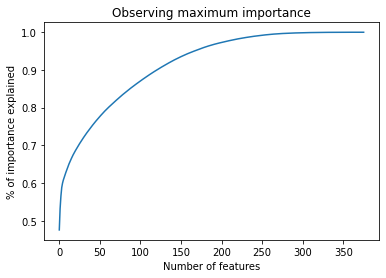

In [ ]:
imp = np.array(sorted(importance_value,reverse=True)).cumsum()
plt.plot(imp)
plt.xlabel('Number of features')
plt.ylabel("% of importance explained")
plt.title('Observing maximum importance')
plt.show()

fg = pp

In [ ]:
X_train5 = X_train4[features[np.argsort(fs1.feature_importances_)[::-1][:]]]

In [ ]:
X_test5 = X_test4[features[np.argsort(fs1.feature_importances_)[::-1][:]]]

In [ ]:
X_train5

,X29_X127,X118,X127,X29,X189,X169,117,103,120,88,100,X47,83,73,119,102,99,135,114,71,87,104,84,132,90,141,7,124,97,85,X142,129,118,111,128,107,123,X152,108,136,...,X159,X67,X274,2,12,54,39,X44,X125,78,X308,32,36,X317,47,X160,69,X183,X310,X17,X60,109,X53,8,X335,X112,62,X258,67,94,79,X281,X277,50,63,93,110,45,59,57
0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4204,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4205,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4206,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# <font color='red'> <b>First Cut Model-5</b></font>

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial5 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial5.fit(X_train5,Y4)
Y_pred_linear_regSGD_trial5 = linear_regSGD_trial5.predict(X_train5)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y4,Y_pred_linear_regSGD_trial5)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: 0.6041172438861377


In [ ]:
cv_score_55 = cross_val_score(linear_regSGD_trial5,X_train5,Y4,cv=5,scoring='r2')
print('Cross-validation score using SGD reg regressor:',np.mean(cv_score_55))

Cross-validation score using SGD reg regressor: 0.5395079796617674


**Random Forest Regressor**

In [ ]:
reg_RForest_trial5 = RandomForestRegressor(random_state=42)
reg_RForest_trial5.fit(X_train5,Y4)
Y_pred_reg_RForest_trial5 = reg_RForest_trial5.predict(X_train5)
print('R² value of TRAIN data with Random forest:',r2_score(Y4,Y_pred_reg_RForest_trial5))

R² value of TRAIN data with Random forest: 0.9166396358710328


In [ ]:
cv_score_555 = cross_val_score(reg_RForest_trial5,X_train5,Y4,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_555))

Cross-validation score using RF regressor: 0.5559349695141715


**XGBoost Regressor**

In [ ]:
reg_XGB_trial5 = XGBRegressor(random_state=42)
reg_XGB_trial5.fit(X_train5,Y4)
Y_pred_reg_XGB_trial5 = reg_XGB_trial5.predict(X_train5)
print('R² value of TRAIN data with XGBoost:',r2_score(Y4,Y_pred_reg_XGB_trial5)) # R² value

[08:10:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6447898520776634


In [ ]:
cv_score_5555 = cross_val_score(reg_XGB_trial5,X_train5,Y4,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_5555))

[08:10:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:10:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.586724275762628


In [ ]:
from prettytable import PrettyTable

table5 = PrettyTable()
table5.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table5.add_row(["Linear regression-SGD","R²",r2_score(Y4,Y_pred_linear_regSGD_trial5),np.mean(cv_score_55)])
table5.add_row(["RF regression","R²",r2_score(Y4,Y_pred_reg_RForest_trial5),np.mean(cv_score_555)])
table5.add_row(["XGB regression","R²",r2_score(Y4,Y_pred_reg_XGB_trial5),np.mean(cv_score_5555)])


print('Table:1 - Data without any feature engineering')
print(table1)
print()
print('Table:2 - Data with constant and quasi-contant features removed')
print(table2)
print()
print('Table:3 - Data with correlated features removed')
print(table3)
print()
print('Table:4 - Data with outlier removed')
print(table4)
print()
print('Table:5 - Created new features')
print(table5)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+

Table:2 - Data with constant and quasi-contant features removed
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   

**OBSERVATION:**

There was significant difference found in the performance of the models, by next experiment only most important features are to be used rather than including all the features.

In [ ]:
X_train6 = X_train4[features[np.argsort(fs1.feature_importances_)[::-1][:150]]]
X_train6

,X29_X127,X118,X127,X29,X189,X169,117,103,120,88,100,X47,83,73,119,102,99,135,114,71,87,104,84,132,90,141,7,124,97,85,X142,129,118,111,128,107,123,X152,108,136,...,X168,X12,X300,X171,X375,X70,X77,X267,X31,X241,X283,X109,X65,X177,X155,X340,76,X223,X341,X181,X224,X275,X13,X164,X313,X68,X154,X20,X22,X191,9,146,X182,X329,30,X103,92,143,65,75
0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4204,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4206,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_test6 = X_test4[features[np.argsort(fs1.feature_importances_)[::-1][:150]]]
X_test6

,X29_X127,X118,X127,X29,X189,X169,117,103,120,88,100,X47,83,73,119,102,99,135,114,71,87,104,84,132,90,141,7,124,97,85,X142,129,118,111,128,107,123,X152,108,136,...,X168,X12,X300,X171,X375,X70,X77,X267,X31,X241,X283,X109,X65,X177,X155,X340,76,X223,X341,X181,X224,X275,X13,X164,X313,X68,X154,X20,X22,X191,9,146,X182,X329,30,X103,92,143,65,75
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0
4205,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4206,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4207,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


# <font color='red'> <b>First Cut Model-6</b></font>

**Linear regression using SGD**

In [ ]:
linear_regSGD_trial6 = SGDRegressor(loss='squared_loss',random_state=42)
linear_regSGD_trial6.fit(X_train6,Y4)
Y_pred_linear_regSGD_trial6 = linear_regSGD_trial6.predict(X_train6)
print('R² value of TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y4,Y_pred_linear_regSGD_trial6)) # R² value

R² value of TRAIN data with LINEAR REGRESSION-SGD: 0.5776864930439427


In [ ]:
cv_score_66 = cross_val_score(linear_regSGD_trial6,X_train6,Y4,cv=5,scoring='r2')
print('Cross-validation score using SGD reg regressor:',np.mean(cv_score_66))

Cross-validation score using SGD reg regressor: 0.4651805838765394


**Random Forest Regressor**

In [ ]:
reg_RForest_trial6 = RandomForestRegressor(random_state=42)
reg_RForest_trial6.fit(X_train6,Y4)
Y_pred_reg_RForest_trial6 = reg_RForest_trial6.predict(X_train6)
print('R² value of TRAIN data with Random forest:',r2_score(Y4,Y_pred_reg_RForest_trial6))

R² value of TRAIN data with Random forest: 0.91779179772023


In [ ]:
cv_score_666 = cross_val_score(reg_RForest_trial6,X_train6,Y4,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_666))

Cross-validation score using RF regressor: 0.5641726927264032


**XGBoost Regressor**

In [ ]:
reg_XGB_trial6 = XGBRegressor(random_state=42)
reg_XGB_trial6.fit(X_train6,Y4)
Y_pred_reg_XGB_trial6 = reg_XGB_trial6.predict(X_train6)
print('R² value of TRAIN data with XGBoost:',r2_score(Y4,Y_pred_reg_XGB_trial6)) # R² value

[08:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost: 0.6491030163012386


In [ ]:
cv_score_6666 = cross_val_score(reg_XGB_trial6,X_train6,Y4,cv=5,scoring='r2')
print('Cross-validation score using RF regressor:',np.mean(cv_score_6666))

[08:14:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using RF regressor: 0.5871367446616518


In [ ]:
from prettytable import PrettyTable

table6 = PrettyTable()
table6.field_names = [ "Model","Metric","Train-Performance","CV-Performance"]

table6.add_row(["Linear regression-SGD","R²",r2_score(Y4,Y_pred_linear_regSGD_trial6),np.mean(cv_score_66)])
table6.add_row(["RF regression","R²",r2_score(Y4,Y_pred_reg_RForest_trial6),np.mean(cv_score_666)])
table6.add_row(["XGB regression","R²",r2_score(Y4,Y_pred_reg_XGB_trial6),np.mean(cv_score_6666)])

print('Table:1 - Data without any feature engineering')
print(table1)
print()
print('Table:2 - Data with constant and quasi-contant features removed')
print(table2)
print()
print('Table:3 - Data with correlated features removed')
print(table3)
print()
print('Table:4 - Data with outlier removed')
print(table4)
print()
print('Table:5 - Created new features')
print(table5)
print()
print('Table:6 - Considering only important features')
print(table6)

Table:1 - Data without any feature engineering
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   R²   | -4.524144309226926e+29 | -2.0685227364125153e+29 |
|     RF regression     |   R²   |   0.9295712478114713   |   -0.1352712572349698   |
|     XGB regression    |   R²   |   0.6230542676875319   |    0.5108734175504892   |
+-----------------------+--------+------------------------+-------------------------+

Table:2 - Data with constant and quasi-contant features removed
+-----------------------+--------+------------------------+-------------------------+
|         Model         | Metric |   Train-Performance    |      CV-Performance     |
+-----------------------+--------+------------------------+-------------------------+
| Linear regression-SGD |   

**Conclusion:**

As per experimenting, final dataset seems to perform better which undergone removal of outlier, constant features,quasi-constant feature, removing correlated features.
Also new features created and important features among all where considered and this reduced dimensions also time of computation.

Thus further proceeding with data which was feature engineered in all possible ways. Also to reduce overfit and to improve the model performance **hyper-parameter tuning** to be performed in upcoming experimentation and get best result.

In [ ]:
X_train6

,X29_X127,X118,X127,X29,X189,X169,117,103,120,88,100,X47,83,73,119,102,99,135,114,71,87,104,84,132,90,141,7,124,97,85,X142,129,118,111,128,107,123,X152,108,136,...,X168,X12,X300,X171,X375,X70,X77,X267,X31,X241,X283,X109,X65,X177,X155,X340,76,X223,X341,X181,X224,X275,X13,X164,X313,X68,X154,X20,X22,X191,9,146,X182,X329,30,X103,92,143,65,75
0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4204,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4205,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4206,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


**Random Forest - Hyperparameter tuning**

In [ ]:
# Hyperparameter tuning Random Forest
Y_train = Y4
reg_RForest = RandomForestRegressor()

prams={
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10,50],
    'min_samples_split':[2,4,6,8,10],
}
random_RForest=RandomizedSearchCV(reg_RForest,param_distributions=prams,verbose=10,n_jobs=-1)
random_RForest.fit(X_train6,Y_train) # Using columns selected from RF

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
random_RForest.best_params_

{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 2000}

In [ ]:
reg_RF_RFM_best = RandomForestRegressor(max_depth=3,min_samples_split=10,n_estimators=2000,random_state=42)
reg_RF_RFM_best.fit(X_train6,Y_train)
Y_pred_RF_RFM_best = reg_RF_RFM_best.predict(X_train6)
print('R² value of RF-TRAIN data with Random forest with tuning:',r2_score(Y_train,Y_pred_RF_RFM_best))

R² value of RF-TRAIN data with Random forest with tuning: 0.60578026268861


In [ ]:
cv_score = cross_val_score(reg_RF_RFM_best,X_train6,Y_train,cv=5,scoring='r2')
print('Cross-validation score using linear regressor:',np.mean(cv_score))

Cross-validation score using linear regressor: 0.5873457771766986


In [ ]:
print('MSLE value of RF-TRAIN data with Random forest with tuning:',mean_squared_log_error(Y_train,Y_pred_RF_RFM_best))

MSLE value of RF-TRAIN data with Random forest with tuning: 0.005027176076785247


In [ ]:
cv_score_msle = cross_val_score(reg_RF_RFM_best,X_train6,Y_train,cv=5,scoring='neg_mean_squared_log_error')
print('Cross-validation score using linear regressor:',np.mean(cv_score_msle)*-1)

Cross-validation score using linear regressor: 0.0052609156440517856


**XGBoost - Hyperparameter tuning**

In [ ]:
reg_XGB=XGBRegressor(random_state=42) 

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_reg_XGB=RandomizedSearchCV(reg_XGB,param_distributions=prams,verbose=10,n_jobs=-1)
random_reg_XGB.fit(X_train6,Y_train) # Using columns selected from RF

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.2min finished


[11:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=42, reg_al...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_job

In [ ]:
random_reg_XGB.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 1}

In [ ]:
# Using best parameteres

reg_RF_Xgm_best = XGBRegressor(n_estimators=500,subsample=1,max_depth=3,learning_rate=0.01,colsample_bytree=0.5,random_state=42)
reg_RF_Xgm_best.fit(X_train6,Y_train)
Y_pred_RF_Xgm_best = reg_RF_Xgm_best.predict(X_train6)
print('R² value of TRAIN data with XGBoost with tuning:',r2_score(Y_train,Y_pred_RF_Xgm_best)) # R² value with RF(RFM)

[11:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of TRAIN data with XGBoost with tuning: 0.6157587625756127


In [ ]:
cv_score_ = cross_val_score(reg_RF_Xgm_best,X_train6,Y_train,cv=5,scoring='r2')
print('Cross-validation score using linear regressor:',np.mean(cv_score_))

[11:34:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using linear regressor: 0.5881796027570745


In [ ]:
print('MSLE value of TRAIN data with XGBoost with tuning:',mean_squared_log_error(Y_train,Y_pred_RF_Xgm_best))

MSLE value of TRAIN data with XGBoost with tuning: 0.004851471257490155


In [ ]:
cv_score_msle_ = cross_val_score(reg_RF_Xgm_best,X_train6,Y_train,cv=5,scoring='neg_mean_squared_log_error')
print('Cross-validation score using linear regressor:',np.mean(cv_score_msle_)*-1)

[11:53:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:53:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using linear regressor: 0.005229393071815408


**Linear Regression - Hyperparameter tuning**

In [ ]:
tr_score_lst = []
cv_score_lst = []
for i in alpha:
  hyp_sgd = SGDRegressor(loss='squared_loss',random_state=42,alpha=i)
  hyp_sgd.fit(X_train6,Y_train)
  train_score = r2_score(Y_train,hyp_sgd.predict(X_train6))
  cv_scores = np.mean(cross_val_score(hyp_sgd,X_train6,Y_train,cv=5,scoring='r2'))
  tr_score_lst.append(train_score)
  cv_score_lst.append(cv_scores)

No handles with labels found to put in legend.


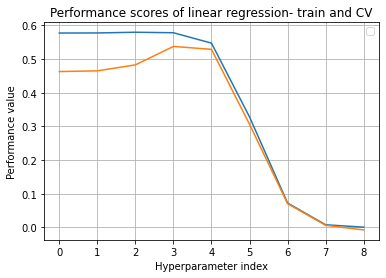

In [ ]:
plt.plot(tr_score_lst)
plt.plot(cv_score_lst)
plt.title('Performance scores of linear regression- train and CV')
plt.xlabel('Hyperparameter index')
plt.ylabel('Performance value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
print('Alpha values:',alpha)
print('Train scores:',tr_score_lst)
print('CV scores:',cv_score_lst)

Alpha values: [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
Train scores: [0.5774354273477438, 0.5776864930439427, 0.5797850247703242, 0.5782912901057078, 0.5473784807613631, 0.3283831563603522, 0.07259959573152519, 0.007920258088616738, 0.0007656317250952505]
CV scores: [0.4629378703910533, 0.4651805838765394, 0.48284341686836696, 0.5376185930421314, 0.5290234494268148, 0.3066217552986081, 0.07057435849157818, 0.00633503463865519, -0.0073684242574897805]


**OBSERVATION:**

From the analysis alpha value : **0.01 selected**

In [ ]:
reg_RF_SGD = SGDRegressor(loss='squared_loss',random_state=42,alpha=0.01)
reg_RF_SGD.fit(X_train6,Y_train)
Y_pred_SGD_RF = reg_RF_SGD.predict(X_train6)
print('R² value of RF-TRAIN data with LINEAR REGRESSION-SGD:',r2_score(Y_train,Y_pred_SGD_RF)) # R² value with RF(SGD)

R² value of RF-TRAIN data with LINEAR REGRESSION-SGD: 0.5782912901057078


In [ ]:
cv_score__ = cross_val_score(reg_RF_SGD,X_train6,Y_train,cv=5,scoring='r2')
print('Cross-validation score using linear regressor:',np.mean(cv_score__))

Cross-validation score using linear regressor: 0.5376185930421314


In [ ]:
print('MSLE value of RF-TRAIN data with LINEAR REGRESSION-SGD:',mean_squared_log_error(Y_train,Y_pred_SGD_RF))

MSLE value of RF-TRAIN data with LINEAR REGRESSION-SGD: 0.005470514998885322


In [ ]:
cv_score_msle__ = cross_val_score(reg_RF_SGD,X_train6,Y_train,cv=5,scoring='neg_mean_squared_log_error')
print('Cross-validation score using linear regressor:',np.mean(cv_score_msle__)*-1)

Cross-validation score using linear regressor: 0.006007189114496317


In [ ]:
table7 = PrettyTable()
table7.field_names = [ "Model","Train-Performance-R²","CV-Performance-R²","Train-Performance-MSLE","CV-Performance-MSLE"]

table7.add_row(["Linear regression-SGD",r2_score(Y_train,Y_pred_SGD_RF),np.mean(cv_score__),mean_squared_log_error(Y_train,Y_pred_SGD_RF),np.mean(cv_score_msle__)*-1])
table7.add_row(["RF regression",r2_score(Y_train,Y_pred_RF_RFM_best),np.mean(cv_score),mean_squared_log_error(Y_train,Y_pred_RF_RFM_best),np.mean(cv_score_msle)*-1])
table7.add_row(["XGB regression",r2_score(Y_train,Y_pred_RF_Xgm_best),np.mean(cv_score_),mean_squared_log_error(Y_train,Y_pred_RF_Xgm_best),np.mean(cv_score_msle_)*-1])

print('Table:7 - Hyperparameter tuned model performance')
print(table7)

Table:7 - Hyperparameter tuned model performance
+-----------------------+----------------------+--------------------+------------------------+-----------------------+
|         Model         | Train-Performance-R² | CV-Performance-R²  | Train-Performance-MSLE |  CV-Performance-MSLE  |
+-----------------------+----------------------+--------------------+------------------------+-----------------------+
| Linear regression-SGD |  0.5782912901057078  | 0.5376185930421314 |  0.005470514998885322  |  0.006007189114496317 |
|     RF regression     |   0.60578026268861   | 0.5873457771766986 |  0.005027176076785247  | 0.0052609156440517856 |
|     XGB regression    |  0.6157587625756127  | 0.5881796027570745 |  0.004851471257490155  |  0.005229393071815408 |
+-----------------------+----------------------+--------------------+------------------------+-----------------------+


**Voting Regressor**

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

from sklearn.ensemble import VotingRegressor
Vr1 = VotingRegressor([('lr',reg_RF_SGD ), ('rf', reg_RF_RFM_best),('xgb',reg_RF_Xgm_best)])
Vr1.fit(X_train6,Y_train)
Y_pred_Vr_RF = Vr1.predict(X_train6)
print('R² value of RF-TRAIN data with Voting regressor:',r2_score(Y_train,Y_pred_Vr_RF))

[11:55:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R² value of RF-TRAIN data with Voting regressor: 0.6128903819601641


In [ ]:
cv_scor = cross_val_score(Vr1,X_train6,Y_train,cv=5,scoring='r2')
print('Cross-validation score using linear regressor:',np.mean(cv_scor))

[11:55:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using linear regressor: 0.5848412621594382


In [ ]:
print('MSLE value of RF-TRAIN data with Voting regressor:',mean_squared_log_error(Y_train,Y_pred_Vr_RF))

MSLE value of RF-TRAIN data with Voting regressor: 0.004919516106247067


In [ ]:
cv_scor = cross_val_score(Vr1,X_train6,Y_train,cv=5,scoring='neg_mean_squared_log_error')
print('Cross-validation score using linear regressor:',np.mean(cv_scor)*-1)

[11:57:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross-validation score using linear regressor: 0.005288605106727856


In [ ]:
# Test data prediction

test_prediction_ = Vr1.predict(X_test6)
test_prediction_

array([ 77.57013979,  95.02798386,  80.79280753, ...,  90.88480241,
       111.40538419,  93.21698441])

In [ ]:
test_result = pd.DataFrame()
test_result['ID'] = test_df['ID']
test_result['y'] = test_prediction_
test_result

,ID,y
0,1,77.570140
1,2,95.027984
2,3,80.792808
3,4,77.988556
4,5,112.701936
...,...,...
4204,8410,104.381546
4205,8411,92.956788
4206,8413,90.884802
4207,8414,111.405384


In [ ]:
test_result.to_csv('Test_result_ohe3.csv',index=False)

**Conclusion:**

1. Thus from the given dataset, all pre-processing, cleaning, feature engineering performed.

2. Best models computed using hyper-parameter tuning and voting regressor used.

3. Voting regressor computes average of the models provided which prevents overfitting issues.

4. Finally voting regressor model used to predict the test data and saved the test data into dataframe which later saved to csv file.